<div class="alert alert-info">
<h1><center><font color=darkblue> ''Machine learning model to determine the recovery of patients with disorders of consciousness'' <font></center></h1>


</div>

# Set up

In [ ]:
!pip install tableone

In [ ]:
!pwd

/content


In [ ]:
#Carga de las librerías y datasets utilizados.values 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import sklearn
import warnings
import getpass
warnings.filterwarnings("ignore")

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.set_option('display.float_format', lambda x: '%.3g' % x)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# subir a github comprimido y con contraseña
# descarga
!wget https://github.com/fermarquez2019/CRS-R_model/raw/master/df.zip

--2020-07-31 22:09:48--  https://github.com/fermarquez2019/CRS-R_model/raw/master/df.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fermarquez2019/CRS-R_model/master/df.zip [following]
--2020-07-31 22:09:48--  https://raw.githubusercontent.com/fermarquez2019/CRS-R_model/master/df.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24061 (23K) [application/zip]
Saving to: ‘df.zip’

df.zip              100%[===================>]  23.50K  --.-KB/s    in 0.01s   

2020-07-31 22:09:48 (1.93 MB/s) - ‘df.zip’ saved [24061/24061]



In [ ]:
passw = getpass.getpass(prompt='Password: ')
!unzip -P {passw} df.zip -d .

Password: ··········
Archive:  df.zip
  inflating: ./df_anonymous.xlsx     


In [ ]:
df = pd.read_excel('df_anonymous.xlsx')

# Exploratory analysis


In [ ]:
df.shape

(90, 84)

In [ ]:
df.columns

Index(['Unnamed: 0', 'edad', 'genero', 'etiologia', 'edad_map', 'edad_map1',
       'LOS', 'evolucion', 'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve', 'CRSi_C',
       'CRSi_Ar', 'CRSi_T', 'conciencia_i', 'JFK_A', 'JFK_V', 'JFK_M',
       'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T', 'seguimiento', 'variacion_CRS_T',
       'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C',
       'variacion_CRS_Ar', 'variacion_CRS_M', 'variacion_CRS_Ve',
       'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C',
       'vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve', 'Improbable1',
       'Improbable2', 'Improbable3', 'Improbable4', 'Improbable5',
       'Improbable6', 'Improbable7', 'Improbable8', 'Improbable9',
       'Improbable10', 'Improbable11', 'Improbable12', 'Improbable13',
       'Improbable14', 'Improbable15', 'Improbable16', 'Improbable17',
       'Improbable18', 'Improbable19', 'Improbable20', 'Improbable21',
       'Improbable22', 'Improbable23', 'Improbable24', 'Improbable25',

In [ ]:
df.columns.duplicated().sum()

0

In [ ]:
df.describe()

,Unnamed: 0,edad,edad_map,edad_map1,LOS,evolucion,CRSi_A,CRSi_V,CRSi_M,CRSi_Ve,CRSi_C,CRSi_Ar,CRSi_T,JFK_A,JFK_V,JFK_M,JFK_Ve,JFK_C,JFK_Ar,JFK_T,seguimiento,variacion_CRS_T,variacion_CRS_A,variacion_CRS_V,variacion_CRS_C,variacion_CRS_Ar,variacion_CRS_M,variacion_CRS_Ve,vel_var_CRS,vel_var_CRS_A,vel_var_CRS_V,vel_var_CRS_C,vel_var_CRS_Ar,vel_var_CRS_M,vel_var_CRS_Ve,Improbable1,Improbable2,Improbable3,Improbable4,Improbable5,Improbable6,Improbable7,Improbable8,Improbable9,Improbable10,Improbable11,Improbable12,Improbable13,Improbable14,Improbable15,Improbable16,Improbable17,Improbable18,Improbable19,Improbable20,Improbable21,Improbable22,Improbable23,Improbable24,Improbable25,Improbable26,Improbable27,Improbable28,Improbable29,Improbable30,Improbable31,Improbable32,Improbable33,Improbable34,Improbable35,Improbable36,improbable30,CRSe_A,CRSe_V,CRSe_M,CRSe_Ve,CRSe_C,CRSe_Ar,CRSe_T,EMERGENCIA
count,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
mean,170,41.3,0.689,0.322,163,127,0.9,1.07,1.74,0.822,0.0444,1.31,5.89,1.73,1.93,2.69,1.21,0.278,1.8,9.62,23.8,3.73,0.833,0.867,0.233,0.489,0.944,0.389,0.162,0.0345,0.0353,0.00926,0.0225,0.0422,0.0191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0111,0.0222,0,0,0.0111,0.0222,0.0222,0.0111,0,0,0.0111,0.0111,0.0111,0,0.0222,0.0222,0.0222,0.0222,0.0889,2.06,2.24,3.19,1.41,0.5,1.88,11.3,0.256
std,96.5,17.4,0.466,0.47,124,235,0.765,1.29,1.1,0.572,0.207,0.729,3.05,1.27,1.82,1.58,0.711,0.636,0.674,5.2,5.63,4.32,1.33,1.34,0.619,0.782,1.41,0.745,0.199,0.0564,0.0596,0.0248,0.0412,0.0683,0.0383,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.105,0.148,0,0,0.105,0.148,0.148,0.105,0,0,0.105,0.105,0.105,0,0.148,0.148,0.148,0.148,0.286,1.4,2.05,1.94,0.833,0.824,0.776,6.84,0.439
min,0,18,0,0,31,14,0,0,0,0,0,0,1,0,0,0,0,0,0,2,8,-3,-1,-2,-1,-2,-1,-1,-0.2,-0.0435,-0.125,-0.04,-0.133,-0.0625,-0.037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
25%,86.8,27,0,0,78,44.2,0,0,1,0.25,0,1,4,1,0,2,1,0,2,6,22,1,0,0,0,0,0,0,0.0404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,1,6,0
50%,175,36,1,0,138,79.5,1,0,2,1,0,1,5,1,2,2,1,0,2,8,25,2.5,0,0,0,0,0,0,0.102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,0,2,8.5,0
75%,250,54.5,1,1,210,132,1,2.75,2,1,0,2,7,2,3,3.75,1,0,2,12,29,4,1,2,0,1,1,1,0.214,0.0582,0.0714,0,0.0417,0.0667,0.0367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4.75,5,2,1,2,17.8,0.75
max,333,81,1,1,641,2.15e+03,4,4,5,3,1,2,17,4,5,6,3,2,3,23,30,17,4,5,2,2,5,3,1.1,0.222,0.227,0.111,0.2,0.4,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,1,1,0,1,1,1,1,1,4,5,6,3,2,3,23,1


In [ ]:
#import pandas_profiling
#import matplotlib.gridspec as gridspec
#import ipywidgets as widgets
#from ipywidgets import GridspecLayout
#report = pandas_profiling.ProfileReport(df)
#report.to_file("profile.html")

In [ ]:
# NaNs

In [ ]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(df)

,Total,Percent
etiologia,5,0.0556
conciencia_e,1,0.0111
variacion_CRS_Ve,0,0
JFK_T,0,0
seguimiento,0,0
variacion_CRS_T,0,0
variacion_CRS_A,0,0
variacion_CRS_V,0,0
variacion_CRS_C,0,0
variacion_CRS_Ar,0,0


## Table 1: All patients

In [ ]:
from tableone import TableOne
#https://github.com/tompollard/tableone/blob/master/tableone.ipynb

data=df

# columns to summarize
columns = ['improbable30','edad', 'edad_map', 'edad_map1',
           'genero', 'etiologia','evolucion','conciencia_i', 
           'LOS', 'seguimiento',
           'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve', 'CRSi_C', 'CRSi_Ar','CRSi_T',
           'JFK_A', 'JFK_V', 'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar','JFK_T',
           #'CRSe_A', 'CRSe_V', 'CRSe_M', 'CRSe_Ve','CRSe_C', 'CRSe_Ar', 'CRSe_T', 
           'conciencia_e', 
           'variacion_CRS_T', 'variacion_CRS_A','variacion_CRS_V', 'variacion_CRS_C', 'variacion_CRS_Ar',
           'variacion_CRS_M', 'variacion_CRS_Ve',
           'vel_var_CRS_A','vel_var_CRS_V', 'vel_var_CRS_C', 'vel_var_CRS_Ar', 'vel_var_CRS_M','vel_var_CRS_Ve',
           'vel_var_CRS',#'improbable30',
 #          'Improbable1','Improbable2', 'Improbable3', 'Improbable4', 'Improbable5','Improbable6', 'Improbable7', 
  #         'Improbable8', 'Improbable9','Improbable10', 'Improbable11', 'Improbable12', 'Improbable13','Improbable14',
   #        'Improbable15', 'Improbable16', 'Improbable17','Improbable18', 'Improbable19', 'Improbable20', 
    #       'Improbable21','Improbable22', 'Improbable23', 'Improbable24', 'Improbable25','Improbable26', 
     #      'Improbable27', 'Improbable28', 'Improbable29','Improbable30', 'Improbable31', 'Improbable32', 
      #     'Improbable33','Improbable34', 'Improbable35', 'Improbable36', 
           'EMERGENCIA']

# columns containing categorical variables
categorical = ['genero', 'etiologia', 'conciencia_i', 'conciencia_e', 'EMERGENCIA','edad_map', 'edad_map1',
               'improbable30']
  
# non-normal variables
nonnormal = ['edad', 'evolucion','LOS', 'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve', 'CRSi_C', 'CRSi_Ar','CRSi_T', 
             'JFK_A', 'JFK_V', 'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar','JFK_T',
             #'CRSe_A', 'CRSe_V', 'CRSe_M', 'CRSe_Ve', 'CRSe_C', 'CRSe_Ar','CRSe_T', 'seguimiento', 
             'variacion_CRS_T', 'variacion_CRS_A','variacion_CRS_V', 'variacion_CRS_C', 'variacion_CRS_Ar',
             'variacion_CRS_M', 'variacion_CRS_Ve', 
             'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V','vel_var_CRS_C', 'vel_var_CRS_Ar', 'vel_var_CRS_M', 
             'vel_var_CRS_Ve']

# limit the binary variable "death" to a single row
#limit = {"EMERGENCIA": 1}

# set the order of the categorical variables
#order = {"ICU": ["MICU", "SICU", "CSRU", "CCU"],
 #        "death": ["1"]}

# alternative labels
labels={'genero':'Género', 
        'etiologia':'Etiología',
        'conciencia_i':'Diagnóstico al ingreso',
        'conciencia_e':'Diagnóstico al egreso',
        'edad':'Edad', 
        'edad_map':'Edad mayor a 30 años', 
        'edad_map1':'Edad mayor a 50 años',
        'evolucion':'Evolución (días)', 
        'seguimiento':'Seguimiento (días)',
        'LOS':'Tiempo desde el ingreso al alta del prote (días)',
        'CRSi_A':'CRS-R Auditiva inicial',
        'CRSi_V':'CRS-R Visual inicial', 
        'CRSi_M':'CRS-R Motor inicial', 
        'CRSi_Ve':'CRS-R Verbal-Oromotor inicial', 
        'CRSi_C':'CRS-R Comunicación inicial', 
        'CRSi_Ar':'CRS-R Vigilia inicial', 
        'CRSi_T':'CRS-R Total inicial',
        'JFK_A':'CRS-R Auditiva al mes', 
        'JFK_V':'CRS-R Visual al mes', 
        'JFK_M':'CRS-R Motor al mes',
        'JFK_Ve':'CRS-R Verbal-Oromotor al mes', 
        'JFK_C':'CRS-R Comunicación al mes', 
        'JFK_Ar':'CRS-R Vigilia al mes',
        'JFK_T':'CRS-R Total al mes',
        'CRSe_A':'CRS-R Auditiva final',
        'CRSe_V':'CRS-R Visual final', 
        'CRSe_M':'CRS-R Motor final', 
        'CRSe_Ve':'CRS-R Verbal-Oromotor final', 
        'CRSe_C':'CRS-R Comunicación final', 
        'CRSe_Ar':'CRS-R Vigilia final', 
        'CRSe_T':'CRS-R Total final',
        'variacion_CRS_T':'Variación CRS-R Total (final-inicial)',
        'variacion_CRS_A':'Variación CRS-R Auditiva',
        'variacion_CRS_V':'Variación CRS-R Visual', 
        'variacion_CRS_C':'Variación CRS-R Comunicación', 
        'variacion_CRS_Ar':'Variación CRS-R Vigilia',
        'variacion_CRS_M':'Variación CRS-R Motor', 
        'variacion_CRS_Ve':'Variación CRS-R Verbal-Oromotor',
        'vel_var_CRS':'Tasa de variación CRS-R Total',
        'vel_var_CRS_A':'Tasa de variación CRS-R',
        'vel_var_CRS_V':'Tasa de variación CRS-R Visual',
        'vel_var_CRS_C':'Tasa de variación CRS-R Comunicación',
        'vel_var_CRS_Ar':'Tasa de variación CRS-R Vigilia',
        'vel_var_CRS_M':'Tasa de variación CRS-R Motor',
        'vel_var_CRS_Ve':'Tasa de variación CRS-R Verbal-Oromotor',
        'improbable30': 'Combinación improbable a los 30 días', 
        'improbable60': 'Combinación improbable a los 60 días',
        'improbable90': 'Combinación improbable a los 90 días',
        'EMERGENCIA': 'Recuperacion de la conciencia'}

# set decimal places for age to 0
decimals = {'sexo_TO':0,'dx1':0,'DOCingreso':0,'edad_TO':0,'tiempo_lesion_ingreso':0,'tiempo_primerJFK_ultimaJFK':0,
            'JFK_A':0,'JFK_V':0,'JFK_M':0,'JFK_Ve':0,'JFK_C':0,'JFK_Ar':0,'JFK_T':0,'JFK_T_ultima':0,'rappaport_i':0,
            'RLA_i':0,'variacion_JFKe_JFKi':0,'vel_var_JFK':0}

# optionally, a categorical variable for stratification
groupby = ['EMERGENCIA']

# create tableone with the input arguments
tabla_totales = TableOne(data, columns=columns, categorical=categorical, 
                   nonnormal=nonnormal, rename=labels, label_suffix=True, 
                   decimals=decimals, #limit=limit
                        )#, order=order)

tabla_totales

Missing             Overall
n                                                                                                90
Combinación improbable a los 30 días, n (%)                      0            0           82 (91.1)
                                                                 1                          8 (8.9)
Edad, median [Q1,Q3]                                                          0    36.0 [27.0,54.5]
Edad mayor a 30 años, n (%)                                      0            0           28 (31.1)
                                                                 1                        62 (68.9)
Edad mayor a 50 años, n (%)                                      0            0           61 (67.8)
                                                                 1                        29 (32.2)
Género, n (%)                                                    F            0           28 (31.1)
                                                                 M                        62 (68.9)
Etiología, n (%)                                                 ACV          5           18 (21.2)
                                                                 Anoxia                   20 (23.5)
                                                                 TEC                      46 (54.1)
                                                                 Tumor                      1 (1.2)
Evolución (días), median [Q1,Q3]                                              0   79.5 [44.2,132.0]
Diagnóstico al ingreso, n (%)                                    MC           0           30 (33.3)
                                                                 SVSR                     60 (66.7)
Tiempo desde el ingreso al alta del prote (días), median [Q1,Q3]              0  138.5 [78.0,209.8]
Seguimiento (días), mean (SD)                                                 0          23.8 (5.6)
CRS-R Auditiva inicial, median [Q1,Q3]                                        0       1.0 [0.0,1.0]
CRS-R Visual inicial, median [Q1,Q3]                                          0       0.0 [0.0,2.8]
CRS-R Motor inicial, median [Q1,Q3]                                           0       2.0 [1.0,2.0]
CRS-R Verbal-Oromotor inicial, median [Q1,Q3]                                 0       1.0 [0.2,1.0]
CRS-R Comunicación inicial, median [Q1,Q3]                                    0       0.0 [0.0,0.0]
CRS-R Vigilia inicial, median [Q1,Q3]                                         0       1.0 [1.0,2.0]
CRS-R Total inicial, median [Q1,Q3]                                           0       5.0 [4.0,7.0]
CRS-R Auditiva al mes, median [Q1,Q3]                                         0             1 [1,2]
CRS-R Visual al mes, median [Q1,Q3]                                           0             2 [0,3]
CRS-R Motor al mes, median [Q1,Q3]                                            0             2 [2,4]
CRS-R Verbal-Oromotor al mes, median [Q1,Q3]                                  0             1 [1,1]
CRS-R Comunicación al mes, median [Q1,Q3]                                     0             0 [0,0]
CRS-R Vigilia al mes, median [Q1,Q3]                                          0             2 [2,2]
CRS-R Total al mes, median [Q1,Q3]                                            0            8 [6,12]
Diagnóstico al egreso, n (%)                                     EMCS         1           23 (25.8)
                                                                 MC                       27 (30.3)
                                                                 SVSR                     39 (43.8)
Variación CRS-R Total (final-inicial), median [Q1,Q3]                         0       2.5 [1.0,4.0]
Variación CRS-R Auditiva, median [Q1,Q3]                                      0       0.0 [0.0,1.0]
Variación CRS-R Visual, median [Q1,Q3]                                        0       0.0 [0.0,2.0]
Variación CRS-R Comunicación, median [Q1,Q3]                            

## Table 2: Group analysis

In [ ]:
# create grouped_table with p values
grouped_table = TableOne(data, columns, categorical, groupby, 
                         nonnormal, labels=labels, decimals=decimals, label_suffix=True, pval = True)
#grouped_table.to_excel('tabla1_grupos.xlsx')
grouped_table

/usr/local/lib/python3.6/dist-packages/tableone/tableone.py:185: DeprecationWarning: The labels argument is deprecated; use rename instead.
  "rename instead.", DeprecationWarning)


Grouped by Recuperacion de la conciencia                                                                   
                                                                                                         Missing             Overall                   0                  1 P-Value
n                                                                                                                                 90                  67                 23        
Combinación improbable a los 30 días, n (%)                      0                                             0           82 (91.1)           64 (95.5)          18 (78.3)   0.024
                                                                 1                                                           8 (8.9)             3 (4.5)           5 (21.7)        
Edad, median [Q1,Q3]                                                                                           0    36.0 [27.0,54.5]    37.0 [27.0,60.0]   35.0 [25.5,43.5]   0.158
Edad mayor a 30 años, n (%)                                      0                                             0           28 (31.1)           19 (28.4)           9 (39.1)   0.483
                                                                 1                                                         62 (68.9)           48 (71.6)          14 (60.9)        
Edad mayor a 50 años, n (%)                                      0                                             0           61 (67.8)           42 (62.7)          19 (82.6)   0.132
                                                                 1                                                         29 (32.2)           25 (37.3)           4 (17.4)        
Género, n (%)                                                    F                                             0           28 (31.1)           22 (32.8)           6 (26.1)   0.732
                                                                 M                                                         62 (68.9)           45 (67.2)          17 (73.9)        
Etiología, n (%)                                                 ACV                                           5           18 (21.2)           16 (25.8)            2 (8.7)   0.075
                                                                 Anoxia                                                    20 (23.5)           16 (25.8)           4 (17.4)        
                                                                 TEC                                                       46 (54.1)           30 (48.4)          16 (69.6)        
                                                                 Tumor                                                       1 (1.2)                                1 (4.3)        
Evolución (días), median [Q1,Q3]                                                                               0   79.5 [44.2,132.0]   86.0 [51.5,144.0]  54.0 [38.0,101.0]   0.054
Diagnóstico al ingreso, n (%)                                    MC                                            0           30 (33.3)           14 (20.9)          16 (69.6)  <0.001
                                                                 SVSR                                                      60 (66.7)           53 (79.1)           7 (30.4)        
Tiempo desde el ingreso al alta del prote (días), median [Q1,Q3]                                               0  138.5 [78.0,209.8]  156.0 [94.0,213.5]  77.0 [40.5,144.5]   0.003
Seguimiento (días), mean (SD)                                                                                  0          23.8 (5.6)          23.7 (5.7)         23.9 (5.4)   0.892
CRS-R Auditiva inicial, median [Q1,Q3]                                                                         0       1.0 [0.0,1.0]       1.0 [0.0,1.0]      1.0 [0.5,1.0]   0.297
CRS-R Visual inicial, median [Q1,Q3]                                                                           0

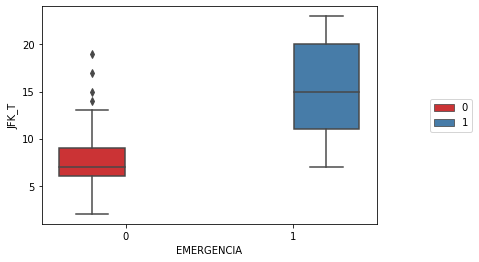

In [ ]:
# Grouped boxplot
ax=sns.boxplot(x="EMERGENCIA", y="JFK_T", hue="EMERGENCIA", data=df, palette="Set1")
#sns.plt.show()
ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

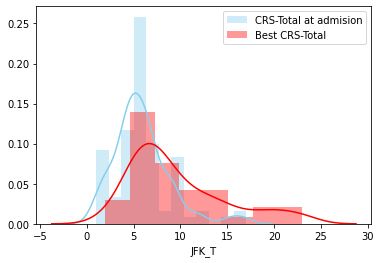

In [ ]:
# Method 1: on the same Axis
sns.distplot( df["CRSi_T"] , color="skyblue", label="CRS-Total at admision")
sns.distplot( df["JFK_T"] , color="red", label="Best CRS-Total")
plt.legend()

In [ ]:
df_pairplot=df[['JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
                'EMERGENCIA']]
#sns_plot=sns.pairplot(df_pairplot, hue="EMERGENCIA", markers=["o", "s"])
#sns_plot.savefig("pairplot.png")

In [ ]:
df_pairplot2=df[['edad','evolucion',
                'CRSi_A', 'CRSi_V', 'CRSi_M', 'CRSi_Ve', 'CRSi_C', 'CRSi_Ar','CRSi_T',
                'EMERGENCIA']]
#sns_plot=sns.pairplot(df_pairplot2, hue="EMERGENCIA", markers=["o", "s"])
#sns_plot.savefig("pairplot.png")

# Preprocessing

In [ ]:
#Get dummies
df=pd.get_dummies(data=df, columns=['conciencia_i','genero', 'etiologia'], prefix = 'cat', drop_first=True)

In [ ]:
df = df.drop(['Unnamed: 0','conciencia_e','CRSe_V', 'CRSe_M', 'CRSe_Ve', 
              'CRSe_C','CRSe_Ar', 'CRSe_T',
              'Improbable1', 'Improbable2', 'Improbable3', 'Improbable4',
              'Improbable5', 'Improbable6', 'Improbable7', 'Improbable8',
              'Improbable9', 'Improbable10', 'Improbable11', 'Improbable12',
              'Improbable13', 'Improbable14', 'Improbable15', 'Improbable16',
              'Improbable17', 'Improbable18', 'Improbable19', 'Improbable20',
              'Improbable21', 'Improbable22', 'Improbable23', 'Improbable24',
              'Improbable25', 'Improbable26', 'Improbable27', 'Improbable28',
              'Improbable29', 'Improbable30', 'Improbable31', 'Improbable32',
              'Improbable33', 'Improbable34', 'Improbable35', 'Improbable36'
              ], axis=1)

## Rename cols

In [ ]:
#Dict to rename cols
dict_cols= {'CRSi_A':'CRSiA', 'CRSi_V':'CRSiV','CRSi_M':'CRSiM', 'CRSi_Ve':'CRSiVe', 'CRSi_C':'CRSiC', 
            'CRSi_Ar':'CRSiAr','CRSi_T':'CRSiT'}
#Rename cols
df=df.rename(columns=dict_cols)

## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
y = df['EMERGENCIA']
df = df.drop('EMERGENCIA', axis=1)
df[:] = scaler.fit_transform(df.values)
df['EMERGENCIA'] = y  

## Imputation

In [ ]:
# Fill nans with median
df_fill = df.fillna(df.median())

# Feature Selection

## Recursive feature elimination with Random Forres and Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['edad', 'edad_map', 'edad_map1', 'LOS', 'evolucion', 'CRSiA', 'CRSiV',
       'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr', 'CRSiT', 'JFK_A', 'JFK_V',
       'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T', 'seguimiento',
       'variacion_CRS_T', 'variacion_CRS_A', 'variacion_CRS_V',
       'variacion_CRS_C', 'variacion_CRS_Ar', 'variacion_CRS_M',
       'variacion_CRS_Ve', 'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V',
       'vel_var_CRS_C', 'vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve',
       'improbable30', 'CRSe_A', 'cat_SVSR', 'cat_M', 'cat_Anoxia', 'cat_TEC',
       'cat_Tumor', 'EMERGENCIA'],
      dtype='object')

In [ ]:
NF75=df[['edad', 'edad_map', 'edad_map1', 'evolucion',
       'CRSiA', 'CRSiV', 'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr', 'CRSiT',
       'JFK_A', 'JFK_V', 'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
       'seguimiento', 'variacion_CRS_T', 'variacion_CRS_A', 'variacion_CRS_V',
       'variacion_CRS_C', 'variacion_CRS_Ar', 'variacion_CRS_M',
       'variacion_CRS_Ve', 'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V',
       'vel_var_CRS_C', 'vel_var_CRS_Ar', 'vel_var_CRS_M', 'vel_var_CRS_Ve',
       'improbable30', 'cat_SVSR', 'cat_M',
       'cat_Anoxia', 'cat_TEC', 'cat_Tumor']]

In [ ]:
### Recursive Feature Elimination with Random Forrest and Cross Validation of NF75

In [ ]:
X1=NF75

# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)
clf_rf = RandomForestClassifier(random_state=42,max_depth=15) 
rfecv = RFECV(estimator=clf_rf, step=1, cv=5,scoring='balanced_accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

# The "accuracy" scoring is proportional to the number of correct classifications
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

#df[X_train.columns[rfecv.support_].values]

Optimal number of features : 20
Best features : Index(['edad', 'evolucion', 'CRSiV', 'CRSiM', 'CRSiT', 'JFK_A', 'JFK_V',
       'JFK_M', 'JFK_Ve', 'JFK_T', 'seguimiento', 'variacion_CRS_T',
       'variacion_CRS_V', 'variacion_CRS_M', 'vel_var_CRS', 'vel_var_CRS_A',
       'vel_var_CRS_V', 'vel_var_CRS_Ar', 'vel_var_CRS_M', 'cat_TEC'],
      dtype='object')


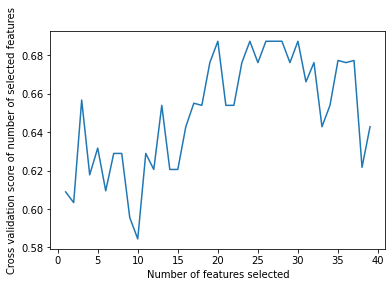

In [ ]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
#RFECV max_depth=5 random_sate=42

#NF46=df[['edad', 'edad_map', 'edad_map1', 'evolucion', 'seguimiento', 'cat_SVSR',
 #      'cat_M', 'cat_Anoxia', 'cat_TEC', 'cat_Tumor', 'CRSiA', 'CRSiV',
  #     'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr', 'CRSiT', 'JFK_A', 'JFK_V',
   #    'JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T', 'variacion_CRS_A',
    #   'variacion_CRS_V', 'variacion_CRS_C', 'variacion_CRS_Ar',
     #  'variacion_CRS_M', 'variacion_CRS_Ve', 'variacion_CRS_T',
      # 'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C', 'vel_var_CRS_Ar',
       # 'vel_var_CRS_M', 'vel_var_CRS_Ve', 'vel_var_CRS', 'improbable30',
       # 'Improbable1', 'Improbable2', 'Improbable3', 'Improbable4',
       # 'Improbable15', 'Improbable18', 'Improbable20']]

In [ ]:
X=df[X_train.columns[rfecv.support_].values]
X

,edad,evolucion,CRSiV,CRSiM,CRSiT,JFK_A,JFK_V,JFK_M,JFK_Ve,JFK_T,seguimiento,variacion_CRS_T,variacion_CRS_V,variacion_CRS_M,vel_var_CRS,vel_var_CRS_A,vel_var_CRS_V,vel_var_CRS_Ar,vel_var_CRS_M,cat_TEC
0,-0.478,-0.0551,-0.833,0.234,-0.623,-0.581,-1.07,-1.08,-0.299,-0.894,-1.39,-0.636,-0.649,-1.39,-0.503,0.498,-0.596,0.977,-1.54,0.978
1,-0.94,-0.441,-0.833,0.234,-0.293,-0.581,-1.07,-0.439,-0.299,-0.7,0.218,-0.636,-0.649,-0.674,-0.616,-0.615,-0.596,0.428,-0.621,0.978
2,-0.651,-0.282,-0.0521,0.234,0.0367,1.79,1.69,2.11,-0.299,1.81,0.575,2.16,2.35,2.18,1.61,1.36,1.9,0.355,1.56,0.978
3,0.503,-0.257,-0.833,-1.6,-1.61,0.211,0.0368,0.836,1.12,0.46,-2.46,1.69,0.849,2.18,4.74,2.95,2.78,1.89,5.27,0.978
4,-0.363,-0.201,-0.0521,0.234,0.367,0.211,0.0368,0.836,-0.299,0.266,1.11,0.062,0.0999,0.753,-0.145,-0.0214,-0.0335,-0.549,0.36,0.978
5,1.14,-0.428,1.51,0.234,0.367,-1.37,0.589,-0.439,-0.299,-0.314,-0.139,-0.636,-0.649,-0.674,-0.599,-0.615,-0.596,0.513,-0.621,-1.02
6,0.676,-0.227,-0.833,0.234,-0.293,-0.581,-1.07,-0.439,-0.299,-0.7,1.11,-0.636,-0.649,-0.674,-0.65,-0.615,-0.596,-0.549,-0.621,-1.02
7,1.14,-0.42,-0.833,0.234,-1.28,-1.37,-1.07,-0.439,-1.71,-1.47,0.932,-0.868,-0.649,-0.674,-0.818,-0.615,-0.596,-0.549,-0.621,-1.02
8,0.214,0.0393,1.51,1.15,3.01,1.79,1.69,2.11,2.53,2.59,-0.317,0.992,0.849,1.47,1.02,0.195,0.938,0.561,1.39,-1.02
9,1.71,-0.377,-0.833,-1.6,-1.61,-0.581,-0.515,-0.439,-0.299,-0.894,-1.03,0.062,0.0999,0.753,0.304,-0.615,0.341,-0.549,1.01,-1.02


Feature ranking:
1. feature JFK_M: 0.0475
2. feature JFK_T: 0.0450
3. feature CRSiT: 0.0486
4. feature vel_var_CRS: 0.0421
5. feature vel_var_CRS_V: 0.0833
6. feature JFK_V: 0.0299
7. feature variacion_CRS_T: 0.0629
8. feature CRSiV: 0.0910
9. feature edad: 0.0384
10. feature evolucion: 0.0902
11. feature CRSiM: 0.0343
12. feature JFK_Ve: 0.0543
13. feature vel_var_CRS_M: 0.0343
14. feature seguimiento: 0.0298
15. feature variacion_CRS_V: 0.0776
16. feature vel_var_CRS_A: 0.0301
17. feature JFK_A: 0.0739
18. feature variacion_CRS_M: 0.0286
19. feature vel_var_CRS_Ar: 0.0351
20. feature cat_TEC: 0.0231


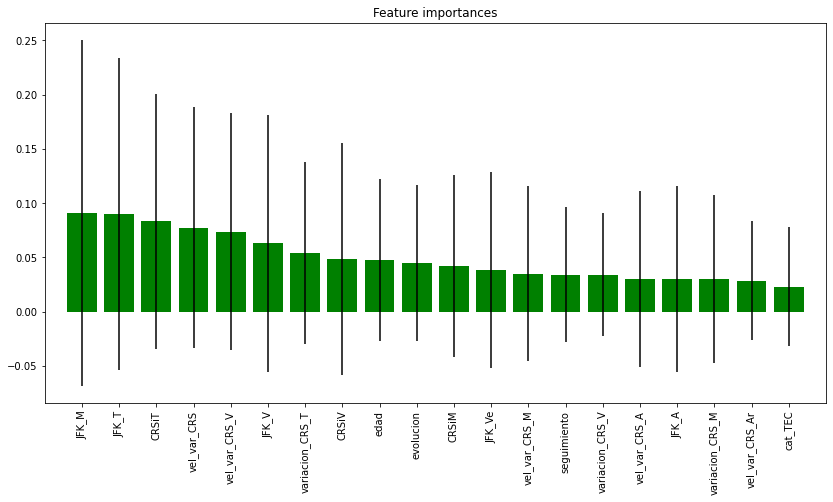

In [ ]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(f"{f+1}. feature {X_train.columns[indices[f]]}: {importances[f]:.4f}")

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Multivariate analysis


In [ ]:
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from statsmodels.tools import add_constant as add_constant

In [ ]:
df.shape

(90, 42)

In [ ]:
logit_df1=df[['edad', 'edad_map', 'edad_map1', 'evolucion', 'seguimiento', 'cat_SVSR','cat_M', 
              'cat_Anoxia', 'cat_TEC',
              'cat_Tumor',
              'EMERGENCIA']]

#logit_df2=df[['cat_SVSR', #Unica variable independiente en log_df1
#              'CRSiA', 'CRSiV','CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr', 'CRSiT',
#              'EMERGENCIA']]

logit_df3=df[['CRSiV', #Unica variable independiente en log_df2
              'JFK_A', 'JFK_V','JFK_M', 'JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
              'EMERGENCIA']]

logit_df4=df[['JFK_T', #Unica variable independiente en log_df3
          #    'improbable30','Improbable19','Improbable30','Improbable34','Improbable35','Improbable36',
              'EMERGENCIA']]

logit_df5=df[['JFK_T', #Unica variable independiente en log_df4
          #    'Improbable20','Improbable23','Improbable26','Improbable29',
              'EMERGENCIA']]

logit_df6=df[['JFK_T', #Unica variable independiente en log_df5
              #'Improbable25','Improbable31',
              'EMERGENCIA']]

logit_df7=df[['JFK_T', #Unica variable independiente en log_df6
              #'Improbable24',
       #       'Improbable33', 
              'EMERGENCIA']]

logit_df8=df[['JFK_T', #Unica variable independiente en log_df7
              #'Improbable24', PENDIENTE SACAR
              'variacion_CRS_A','variacion_CRS_V', 'variacion_CRS_C', 'variacion_CRS_Ar','variacion_CRS_M', 
              'variacion_CRS_Ve', 'variacion_CRS_T',
              'EMERGENCIA']]

logit_df9=df[['JFK_T', #Unica variable independiente en log_df8
              #'Improbable24', PENDIENTE SACAR
              'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C', 
              'vel_var_CRS_Ar',
              'vel_var_CRS_M', 
              'vel_var_CRS_Ve', 
              #'vel_var_CRS',
             #'EMERGENCIA'
             ]]

logit_df10=df[['JFK_T', #Unica variable independiente en log_df9
              #'Improbable24', PENDIENTE SACAR
              'vel_var_CRS',
             'EMERGENCIA']]

logit_df10=df[['JFK_T', #Unica variable independiente en log_df10
          #    'Improbable24',# PENDIENTE SACAR
              'EMERGENCIA']]

In [ ]:
logit_df=logit_df9#.join(df.EMERGENCIA)

logit_df_constant = add_constant(logit_df)
logit_df_constant.head()

,const,JFK_T,vel_var_CRS_A,vel_var_CRS_V,vel_var_CRS_C,vel_var_CRS_Ar,vel_var_CRS_M,vel_var_CRS_Ve
0,1,-0.894,0.498,-0.596,-0.375,0.977,-1.54,-0.502
1,1,-0.7,-0.615,-0.596,-0.375,0.428,-0.621,-0.502
2,1,1.81,1.36,1.9,1.12,0.355,1.56,-0.502
3,1,0.46,2.95,2.78,-0.375,1.89,5.27,4.75
4,1,0.266,-0.0214,-0.0335,-0.375,-0.549,0.36,-0.502


In [ ]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
model=sm.Logit(y,logit_df_constant)
result=model.fit(random_state=42)
result.summary()

Optimization terminated successfully.
         Current function value: 0.344677
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             EMERGENCIA   No. Observations:                   90
Model:                          Logit   Df Residuals:                       82
Method:                           MLE   Df Model:                            7
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.3936
Time:                        22:11:10   Log-Likelihood:                -31.021
converged:                       True   LL-Null:                       -51.152
Covariance Type:            nonrobust   LLR p-value:                 1.121e-06
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.5694      0.371     -4.232      0.000      -2.296      -0.843
JFK_T              2.0491      0.599      3.424      0.001       0.876       3.222
vel_var_CRS_A     -0.3486      0.452     -0.771      0.441      -1.235       0.538
vel_var_CRS_V      0.0677      0.346      0.196      0.845      -0.610       0.746
vel_var_CRS_C      0.0831      0.462      0.180      0.857      -0.822       0.989
vel_var_CRS_Ar    -0.4132      0.432     -0.956      0.339      -1.260       0.434
vel_var_CRS_M      0.0276      0.394      0.070      0.944      -0.745       0.800
vel_var_CRS_Ve     0.0210      0.369      0.057      0.955      -0.701       0.744
==================================================================================
"""

In [ ]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""
   
    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(logit_df_constant,y,logit_df.columns)

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             EMERGENCIA   No. Observations:                   90
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                            0
Date:                Fri, 31 Jul 2020   Pseudo R-squ.:                  0.1247
Time:                        22:11:10   Log-Likelihood:                -44.774
converged:                       True   LL-Null:                       -51.152
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
JFK_T          1.7700      0.392      4.515      0.000       1.002       2.538
==============================================================================
"""

In [ ]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,6)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

       CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
JFK_T          2.72           12.7        5.87   6e-06


In [ ]:
NF1=df[['JFK_T']]

<div class="alert alert-info">
<h1><center><font color=darkblue> SELECT DATASET <font></center></h1>


</div>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import balanced_accuracy_score,roc_curve, roc_auc_score, confusion_matrix

In [ ]:
print('Tamaño del DF seleccionado')
print(df.shape)
print('Tamaño del conjunto de  X Entrenamiento')
print(X_train.shape)
print('Tamaño del conjunto de  y Entrenamiento')
print(y_train.shape)
print('Tamaño del conjunto de X Test')
print(X_test.shape)
print('Tamaño del conjunto de y Test')
print(y_test.shape)

Tamaño del DF seleccionado
(90, 42)
Tamaño del conjunto de  X Entrenamiento
(63, 20)
Tamaño del conjunto de  y Entrenamiento
(63,)
Tamaño del conjunto de X Test
(27, 20)
Tamaño del conjunto de y Test
(27,)


In [ ]:
#http://www.davidsbatista.net/blog/2018/02/23/model_optimization/
class EstimatorSelectionHelper:
    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=5, n_jobs=-1, verbose=1, scoring='balanced_accuracy', refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring='balanced_accuracy', refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        modelss= []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [ ]:
random_state=42
models = { 
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(probability=True),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(),
    'MLPClassifier':MLPClassifier()
                }

params = { 
    'RandomForestClassifier': [
        {'criterion': ['gini', 'entropy'],'n_estimators': [1,2,3,4,5,10,15,20],
         'max_depth': [1,2,3,4,5, 8, 15, 20]},
    ],
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10, 100, 1000], 'probability':[True]},
        {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [0.0001,0.001, 0.01, 0.1,1, 10], 'probability':[True]}
    ],
    'DecisionTreeClassifier':[
        {'criterion': ['gini', 'entropy'],
         'max_depth': [1,2,3,4,5,10,15,20]}
    ],
    'KNeighborsClassifier':[
        {'n_neighbors': [2,4,8,16]}
    ],
    'LogisticRegression':[
        {'penalty': ['l2','l1'],"C": np.logspace(0, 2, 10)},
        {'penalty': ['l2'],"C": np.logspace(0, 2, 10),"solver":['newton-cg','saga','sag','liblinear']} ##This solvers don't allow L1 penalty
    ],
    'MLPClassifier': [
                       {'hidden_layer_sizes': range(1,200,10) , 
                        'activation': ['tanh','logistic','relu'],
                        'alpha':[0.0001,0.001,0.01,0.1,1,10], 
                        'max_iter': range(50,200,50)
                        }
    ] 
}

In [ ]:
X

,edad,evolucion,CRSiV,CRSiM,CRSiT,JFK_A,JFK_V,JFK_M,JFK_Ve,JFK_T,seguimiento,variacion_CRS_T,variacion_CRS_V,variacion_CRS_M,vel_var_CRS,vel_var_CRS_A,vel_var_CRS_V,vel_var_CRS_Ar,vel_var_CRS_M,cat_TEC
0,-0.478,-0.0551,-0.833,0.234,-0.623,-0.581,-1.07,-1.08,-0.299,-0.894,-1.39,-0.636,-0.649,-1.39,-0.503,0.498,-0.596,0.977,-1.54,0.978
1,-0.94,-0.441,-0.833,0.234,-0.293,-0.581,-1.07,-0.439,-0.299,-0.7,0.218,-0.636,-0.649,-0.674,-0.616,-0.615,-0.596,0.428,-0.621,0.978
2,-0.651,-0.282,-0.0521,0.234,0.0367,1.79,1.69,2.11,-0.299,1.81,0.575,2.16,2.35,2.18,1.61,1.36,1.9,0.355,1.56,0.978
3,0.503,-0.257,-0.833,-1.6,-1.61,0.211,0.0368,0.836,1.12,0.46,-2.46,1.69,0.849,2.18,4.74,2.95,2.78,1.89,5.27,0.978
4,-0.363,-0.201,-0.0521,0.234,0.367,0.211,0.0368,0.836,-0.299,0.266,1.11,0.062,0.0999,0.753,-0.145,-0.0214,-0.0335,-0.549,0.36,0.978
5,1.14,-0.428,1.51,0.234,0.367,-1.37,0.589,-0.439,-0.299,-0.314,-0.139,-0.636,-0.649,-0.674,-0.599,-0.615,-0.596,0.513,-0.621,-1.02
6,0.676,-0.227,-0.833,0.234,-0.293,-0.581,-1.07,-0.439,-0.299,-0.7,1.11,-0.636,-0.649,-0.674,-0.65,-0.615,-0.596,-0.549,-0.621,-1.02
7,1.14,-0.42,-0.833,0.234,-1.28,-1.37,-1.07,-0.439,-1.71,-1.47,0.932,-0.868,-0.649,-0.674,-0.818,-0.615,-0.596,-0.549,-0.621,-1.02
8,0.214,0.0393,1.51,1.15,3.01,1.79,1.69,2.11,2.53,2.59,-0.317,0.992,0.849,1.47,1.02,0.195,0.938,0.561,1.39,-1.02
9,1.71,-0.377,-0.833,-1.6,-1.61,-0.581,-0.515,-0.439,-0.299,-0.894,-1.03,0.062,0.0999,0.753,0.304,-0.615,0.341,-0.549,1.01,-1.02


In [ ]:
def train(X, y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

  #Run GRidsearch
  helper_report = EstimatorSelectionHelper(models, params)
  helper_report.fit(X_train, y_train, scoring=('balanced_accuracy'), n_jobs=1) # RECALL=SENSITIVITY

  helper_report=helper_report.score_summary(sort_by='max_score')
  #Get best socred models
  best_helpers_report=helper_report.drop_duplicates(subset='estimator', keep='first')
  #Order columns
  best_helpers_report=best_helpers_report.sort_values(by=['estimator'])

  #Create report
  return best_helpers_report

<div class="alert alert-info">
<h1><center><font color=darkblue> Fit helpers report with each feature set and train best model <font></center></h1>


</div>

In [ ]:
feats = dict(o_max=['edad','edad_map','edad_map1', 'LOS', 'evolucion','seguimiento','cat_SVSR', 'cat_M', 
          'cat_Anoxia', 'cat_TEC','cat_Tumor',
          'CRSiA', 'CRSiV', 'CRSiM', 'CRSiVe', 'CRSiC', 'CRSiAr','CRSiT', 
          'JFK_A', 'JFK_V', 'JFK_M','JFK_Ve', 'JFK_C', 'JFK_Ar', 'JFK_T',
          'variacion_CRS_A', 'variacion_CRS_V', 'variacion_CRS_C','variacion_CRS_Ar', 'variacion_CRS_M', 
          'variacion_CRS_Ve','variacion_CRS_T',
          'vel_var_CRS_A', 'vel_var_CRS_V', 'vel_var_CRS_C','vel_var_CRS_Ar', 'vel_var_CRS_M','vel_var_CRS_Ve',
          'vel_var_CRS', 
          #'Improbable1','Improbable2', 'Improbable3', 'Improbable4', 'Improbable5','Improbable6', 'Improbable7', 
          #'Improbable8', 'Improbable9','Improbable10', 'Improbable11', 'Improbable12', 'Improbable13','Improbable14',
          #'Improbable15', 'Improbable16', 'Improbable17','Improbable18', 'Improbable19', 'Improbable20', 
          #'Improbable21','Improbable22', 'Improbable23', 'Improbable24', 'Improbable25','Improbable26', 
          #'Improbable27', 'Improbable28', 'Improbable29','Improbable30', 'Improbable31', 'Improbable32', 
          #'Improbable33',       'Improbable34', 'Improbable35', 'Improbable36', 
          #'improbable30'
          ], 
     option1=['JFK_T'],
     option19=['edad', 'CRSiV', 'CRSiM', 'CRSiT', 'evolucion', 'JFK_A', 'JFK_V',
       'JFK_M', 'JFK_Ve', 'JFK_T', 'seguimiento', 'variacion_CRS_T',
       'variacion_CRS_V', 'variacion_CRS_M', 'vel_var_CRS', 'vel_var_CRS_A',
       'vel_var_CRS_V', 'vel_var_CRS_Ar', 'cat_TEC'],
     #FS RFCV SIN seguimiento
     option1_FSrecall=['edad', 'CRSiV', 'CRSiM', 'CRSiT', 'evolucion', 'JFK_A', 'JFK_V',
            'JFK_M', 'JFK_Ve', 'JFK_T', 
            'seguimiento','variacion_CRS_T','variacion_CRS_M', 'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V',
            'vel_var_CRS_M','cat_TEC'],
     #FS RFCV SIN seguimiento
     option2=['edad', 'CRSiV', 'CRSiM', 'CRSiT', 'evolucion', 'JFK_A', 'JFK_V','JFK_M', 'JFK_Ve', 'JFK_T', 
            #'seguimiento', 
            'variacion_CRS_T','variacion_CRS_M', 'vel_var_CRS', 'vel_var_CRS_A', 'vel_var_CRS_V','vel_var_CRS_M', 
            'cat_TEC'],
     # 1. Select high correlated values by cut point rho Spearman >0.9 in heatmap
     # 2. Delete less important in Fature importances plot
     option3=['edad', 'CRSiV', 'CRSiM', 'CRSiT', 'evolucion', 'JFK_A', 'JFK_V','JFK_M', 'JFK_Ve', 'JFK_T', 
              #'seguimiento', 
              'variacion_CRS_T',
              #'variacion_CRS_M', 
              #'vel_var_CRS', 
              'vel_var_CRS_A', 'vel_var_CRS_V','vel_var_CRS_M', 'cat_TEC'],
     # 1. Select high correlated values by cut point rho Spearman >0.7 in heatmap
     # 2. Delete less important in Fature importances plot
     option5=['edad', #'CRSi_V', 
              #'CRSi_M', #'CRSi_T', 
              'evolucion', #'JFK_A', 
              #'JFK_V', #'JFK_M', 
              #'JFK_Ve',
              'JFK_T', 
              #'seguimiento', #'variacion_CRS_T',
              #'variacion_CRS_M', #'vel_var_CRS', 
              #'vel_var_CRS_A', #'vel_var_CRS_V',
              'vel_var_CRS_M', 'cat_TEC'])

In [ ]:
def get_best(x):
  global models
  model_name = x['estimator']
  params = x[[c for c in x.index if c != 'estimator' and 'score' not in c]].dropna()
  return eval(model_name)(**params)

In [ ]:
# gridsearchcv para cada modelo para cada set de features
best_models = {}

for k in feats:
  k = 'o_max'
  X = df[feats[k]]
  best_report = train(X, y)
  best_report
  make_conf_metrics(x)

for idx, x in best_report.iterrows():
  best_models[x['estimator']] = get_best(x)
  #conf_metrics = make_conf_metrics(best_report)
  #conf_metrics.to_excel(f'metrics_{k}.xlsx')
best_models

In [ ]:
make_conf_metrics(best_models)

In [ ]:
# dfs = []
# for i in range(len(feats)):
#  dfs.append(pd.read_excel(f'option{i}.xlsx'))/
# full = pd.concat(dfs)

In [ ]:
#https://www.ritchieng.com/machine-learning-evaluate-classification-model/
report=conf_metrics[['FS', 'NF', 'Scoring', 'classifiers', 'Accuracy', 'AUC','Sensitivity', 'Specificity', 'f_1 Score',
                     'Miss-Classification', 'TP', 'TN', 'FP', 'FN']].sort_values(by=['NF'],ascending=True)

report.sort_values(by=['Sensitivity','Specificity','AUC'],ascending=False)
#report.sort_values(by=['NF'],ascending=True)

In [ ]:
report.columns

In [ ]:
f,ax = plt.subplots(figsize=(7, 6))
plt.title('Sensibilidad en funcion de cantidad de variables', y=1.05, size=15)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

ax = sns.scatterplot(x="NF", y="Accuracy",
                     size="Sensitivity", sizes=(0.5, 300), 
                     hue="classifiers", hue_norm=(0.0, 5),
                     legend="full", data=report)
ax.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), ncol=2)

In [ ]:
f,ax = plt.subplots(figsize=(7, 6))
plt.title('Especificidad en funcion de cantidad de variables', y=1.05, size=15)
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

ax = sns.scatterplot(x="NF", y="Accuracy",
                     size="Specificity", sizes=(1, 300), 
                     hue="classifiers", hue_norm=(0.0, 6),
                     legend="full", data=report)
ax.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), ncol=2)

In [ ]:
g = sns.FacetGrid(report, col="classifiers", hue="classifiers", col_wrap=3, height=3, aspect=1,ylim=(0, 1))
g.map(sns.pointplot, "NF", "Accuracy", order=[1, 5, 10, 15, 19], color=".3", ci=None)

In [ ]:
g = sns.relplot(x="NF", y="Accuracy",
                 col="classifiers", hue="classifiers", #style="event",
                 kind="line", height=5, aspect=.9,
                data=report)

# Supervisado



In [ ]:
!pip install catboost
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, StratifiedKFold, StratifiedShuffleSplit, cross_val_score

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

     |████████████████████████████████| 64.8MB 68kB/s 


In [ ]:
def make_random_model(clf, X, y, params, splits=10, verbose=0, test_size=0.2, **kwargs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)
    #kf = StratifiedKFold(n_splits=splits,shuffle=True,random_state=11)
    kf = StratifiedShuffleSplit(n_splits=splits, test_size=test_size)
    rscv = RandomizedSearchCV(clf, param_distributions = params, cv = kf, return_train_score=True, 
                              random_state = None, **kwargs)
    model = rscv.fit(X_train, y_train)
    test_score_mean = np.mean(model.cv_results_['mean_test_score'])
    test_score_std = np.std(model.cv_results_['mean_test_score'])
    train_score_mean = np.mean(model.cv_results_['mean_train_score'])
    train_score_std = np.std(model.cv_results_['mean_train_score'])
    if verbose:
      print('Best params:'), 
      pprint(model.best_params_)
      print(f"Mean CV score: {score:.3g}")
    return model.best_estimator_, model.best_params_, test_score_mean, test_score_std, train_score_mean, train_score_std

In [ ]:
xgb = XGBClassifier(
        #n_jobs = -1,
        objective = 'binary:logistic',
        verbosity=0,
        #tree_method='gpu_hist'
        )
params_xgb = {'n_estimators': [100, 200, 500, 750, 1000],
              'learning_rate': [0.001,0.01,0.05,0.1,0.3, 0.5, 1],
              'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10, 20],
              'max_depth': range(3,90,5),
              'min_child_weight':[1, 2, 4, 6, 8, 10, 12],
              'gamma':[1/i for i in range(1,100,5)],
              'subsample':[1/i for i in range(1,100,5)],
              'colsample_bytree':[1/i for i in range(1,50,2)],
              'scale_pos_weight': [1,5,10,50]}

cat = CatBoostClassifier(loss_function='Logloss',
                         verbose = False,
                         thread_count=-1,
                         #task_type="GPU"
                         )
params_cat = {'depth':range(2,16,2),
              'iterations':[100,250,500, 750],
              'learning_rate':[0.001,0.01,0.05,0.1,0.3, 0.5, 1], 
              'l2_leaf_reg':[3,5,10,20,100],
              'border_count':[20,50,100,200,250],
              'scale_pos_weight': [1,5,10,50]}

lgbm = LGBMClassifier()
params_lgbm = {'learning_rate': [0.001,0.01,0.05,0.1,0.3, 0.5, 1],
                'num_leaves': range(2,100,10),      
                'max_depth': range(3,90,5),
                'min_child_samples': range(0, 50,10),
                'max_bin': range(100, 1000, 100),
                'subsample': [1/i for i in range(1, 100, 10)],
                'colsample_bytree': [1/i for i in range(1, 100, 10)],
                'reg_lambda': [1e-9, 1e-2, 0.1, 1, 10, 100, 1000],
                'reg_alpha': [1e-5, 1e-2, 0.1, 1, 10, 20],
                'scale_pos_weight': [1,5,10,50],
                'min_data_in_leaf': range(10, 1000, 100),
                'feature_fraction': [0.001,0.01,0.05,0.1,0.3, 0.5, 1],
                'n_estimators': [100, 200, 500, 750, 1000]}

In [ ]:
rf = RandomForestClassifier()
params_rf =  {'criterion': ['gini', 'entropy'],
              'n_estimators': [1,2,3,4,5,10,15,20],
              'max_depth': [1,2,3,4,5, 8, 15, 20]}

svc = SVC()
params_svc = {'kernel': ['rbf', 'linear'], 'C': [1, 10, 100, 1000], 'gamma': [0.0001,0.001, 0.01, 0.1,1, 10], 'probability':[True]}   

DTree = DecisionTreeClassifier()
params_dtree = {'criterion': ['gini', 'entropy'],
                'max_depth': [1,2,3,4,5,10,15,20]}

knn = KNeighborsClassifier()
params_knn =  {'n_neighbors': [2,4,8,16]}

logit = LogisticRegression()
params_logit = {'penalty': ['l2','l1'],"C": np.logspace(0, 2, 10),"solver":['newton-cg','saga','sag','liblinear']}

mlp = MLPClassifier()
params_mlp = {'hidden_layer_sizes': range(1,200,10) , 
              'activation': ['tanh','logistic','relu'],
              'alpha':[0.0001,0.001,0.01,0.1,1,10], 
              'max_iter': range(50,200,50)}


gnb = GaussianNB()
params_gnb = {'priors': [None]}

In [ ]:
model_dict = {'LGBM': {'model':lgbm,
                       'param_random':params_lgbm},
              'CAT': {'model':cat,
                      'param_random':params_cat},
              'XGB': {'model': xgb,
                      'param_random':params_xgb},
              'RF': {'model': rf,
                      'param_random':params_rf},
              'SVC': {'model': svc,
                      'param_random':params_svc},
              'DTree': {'model': DTree,
                      'param_random':params_dtree},
              'KNN': {'model': knn,
                      'param_random':params_knn},
              'LOGIT': {'model': logit,
                      'param_random':params_logit},
              'MLP': {'model': mlp,
                      'param_random':params_mlp},
              'GNB' : {'model': gnb, 
                       'param_random':params_gnb}
              }

In [ ]:
np.random.seed(42)
from time import strftime
from IPython.display import display, HTML
#from pprint import pprint

train_df = pd.DataFrame()
all_df = []
 
# Iteramos cada dataset
for k in feats:
  print(f'Entrenando con {k}')
  X = df[feats[k]]

  print(f'FEATURE SET {k.upper()}')
  # Iteramos cada modelo
  for m in model_dict:
    # Metricas con las que elegir el mejor candidato
    for scoring in ['balanced_accuracy']:
      # grilla de parametros
      params = model_dict[m]['param_random']
 
 
 #CAMBIE EL TEST SIZE A 0.3     
 
 
      # train test externo
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

      # cross validation dentro de train
      model, params, test_score_mean, test_score_std, train_score_mean, train_score_std = make_random_model(model_dict[m]['model'], X_train, y_train, params,
                                    scoring = scoring, n_iter=30, splits=10, test_size=0.2)
      
      # evaluamos en test (CON ESTAS PRUEBAS AJUSTAMOS AL TEST SET, ES NECESARIO SEPARAR UNO DE VALICACIÓN)
      y_pred = model.predict(X_test)
      print(m, scoring, f"{test_score_mean:.5f}")
      #print(classification_report(y_test, y_pred))
      res = classification_report(y_test, y_pred, output_dict=True) 
      res = pd.json_normalize(res, sep='_').iloc[0].to_dict()
      res['model'] = m
      res['test_score_mean'] = test_score_mean
      res['test_score_std'] = test_score_std
      res['train_score_mean'] = train_score_mean
      res['train_score_std'] = train_score_mean      
      res['scoring'] = scoring
      res['feats'] = k
      res.update(params)
      #pprint(res)

      train_df = train_df.append(res, True)


display(train_df.loc[:, ['model'] + [c for c in train_df.columns if c != 'model']].dropna(axis=1).sort_values(by='1_precision', ascending=False))
all_df.append(train_df)

Entrenando con o_max
FEATURE SET O_MAX
LGBM balanced_accuracy 0.52093
CAT balanced_accuracy 0.67296
XGB balanced_accuracy 0.51056
RF balanced_accuracy 0.63889
SVC balanced_accuracy 0.56815
DTree balanced_accuracy 0.65035
KNN balanced_accuracy 0.52778
LOGIT balanced_accuracy nan
MLP balanced_accuracy 0.67463
GNB balanced_accuracy 0.73889
Entrenando con option1
FEATURE SET OPTION1
LGBM balanced_accuracy 0.53370
CAT balanced_accuracy 0.71407
XGB balanced_accuracy 0.50352
RF balanced_accuracy 0.77741
SVC balanced_accuracy 0.72796
DTree balanced_accuracy 0.60556
KNN balanced_accuracy 0.71528
LOGIT balanced_accuracy nan
MLP balanced_accuracy 0.57870
GNB balanced_accuracy 0.67778
Entrenando con option19
FEATURE SET OPTION19
LGBM balanced_accuracy 0.51019
CAT balanced_accuracy 0.67722
XGB balanced_accuracy 0.50222
RF balanced_accuracy 0.71741
SVC balanced_accuracy 0.66630
DTree balanced_accuracy 0.56250
KNN balanced_accuracy 0.73750
LOGIT balanced_accuracy nan
MLP balanced_accuracy 0.68722
GNB

,model,0_f1-score,0_precision,0_recall,0_support,1_f1-score,1_precision,1_recall,1_support,accuracy,feats,macro avg_f1-score,macro avg_precision,macro avg_recall,macro avg_support,scoring,weighted avg_f1-score,weighted avg_precision,weighted avg_recall,weighted avg_support
8,MLP,0.897,0.812,1,13,0.571,1,0.4,5,0.833,o_max,0.734,0.906,0.7,18,balanced_accuracy,0.806,0.865,0.833,18
14,SVC,0.897,0.812,1,13,0.571,1,0.4,5,0.833,option1,0.734,0.906,0.7,18,balanced_accuracy,0.806,0.865,0.833,18
46,KNN,0.897,0.812,1,13,0.571,1,0.4,5,0.833,option2,0.734,0.906,0.7,18,balanced_accuracy,0.806,0.865,0.833,18
45,DTree,0.963,0.929,1,13,0.889,1,0.8,5,0.944,option2,0.926,0.964,0.9,18,balanced_accuracy,0.942,0.948,0.944,18
33,RF,0.963,0.929,1,13,0.889,1,0.8,5,0.944,option1_FSrecall,0.926,0.964,0.9,18,balanced_accuracy,0.942,0.948,0.944,18
66,KNN,0.897,0.812,1,13,0.571,1,0.4,5,0.833,option5,0.734,0.906,0.7,18,balanced_accuracy,0.806,0.865,0.833,18
12,XGB,1,1,1,13,1,1,1,5,1,option1,1,1,1,18,balanced_accuracy,1,1,1,18
17,LOGIT,0.929,0.867,1,13,0.75,1,0.6,5,0.889,option1,0.839,0.933,0.8,18,balanced_accuracy,0.879,0.904,0.889,18
18,MLP,0.897,0.812,1,13,0.571,1,0.4,5,0.833,option1,0.734,0.906,0.7,18,balanced_accuracy,0.806,0.865,0.833,18
48,MLP,0.923,0.923,0.923,13,0.8,0.8,0.8,5,0.889,option2,0.862,0.862,0.862,18,balanced_accuracy,0.889,0.889,0.889,18


In [ ]:
from google.colab import files
train_df.to_csv('data_modelos.csv')
files.download('data_modelos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Completamos los nulos con la mediana por ser más robusta a valores extremos. Podríamos hacer df.groupby(sexo, edad).median(), en vez de la mediana
- Usamos PCA para reducción de dimensionalidad manteniendo un 0.99 de la información, y aplicamos clustering usando la "regla del codo" para elegir el mejor número de clusters. 
- Para visualización, usamos UMAP como reducción de dimensionalidad no lineal
- random search.
Además de ser más económico que gridsearch por no probar todos los elementos, random search puede encontrar combinaciones de parámetros mejores que gridsearch, ya que trabaja en el dominio de los reales en vez de estar limitado por la grilla definida por el usuario.
- Los modelos de boosting son un tipo de ensamble que entrena cada modelo utilizando los errores o residuos del modelo anterior, mejorando secuencialmente. Son de las herramientas más potentes dentro de "shallow machine learning".

In [ ]:
# Agregar?
Brier score?
https://machinelearningmastery.com/how-to-score-probability-predictions-in-python/

Cuadro de heterogeneidad ej: https://www.sciencedirect.com/science/article/pii/S0895435619308753#tbl4

Explorar Nonadditivity and nonlinearity?

# Unsupervised

In [49]:
# import hdbscan
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

!pip install umap-learn
import umap

from sklearn.manifold import TSNE

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
pca = PCA(0.99, whiten=True)
reduced = pca.fit_transform(df)
reduced.shape

(90, 24)

In [51]:
scaler = umap.UMAP(n_components=3)
reduced = scaler.fit_transform(df)
reduced = (reduced-reduced.mean())/(reduced.std())

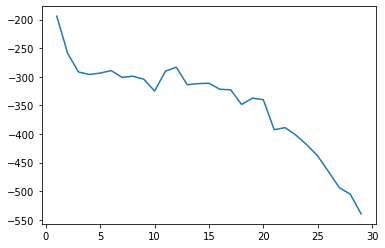

In [ ]:
n_components = np.arange(1, 30, 1)
models = [GaussianMixture(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(reduced).aic(reduced) for model in models]
plt.plot(n_components, aics);

In [52]:
X

,edad,evolucion,JFK_T,vel_var_CRS_M,cat_TEC
0,-0.478,-0.0551,-0.894,-1.54,0.978
1,-0.94,-0.441,-0.7,-0.621,0.978
2,-0.651,-0.282,1.81,1.56,0.978
3,0.503,-0.257,0.46,5.27,0.978
4,-0.363,-0.201,0.266,0.36,0.978
5,1.14,-0.428,-0.314,-0.621,-1.02
6,0.676,-0.227,-0.7,-0.621,-1.02
7,1.14,-0.42,-1.47,-0.621,-1.02
8,0.214,0.0393,2.59,1.39,-1.02
9,1.71,-0.377,-0.894,1.01,-1.02


In [54]:
# https://en.wikipedia.org/wiki/Elbow_method_(clustering)

# run kmeans with many different k
distortions = []
K = range(2, 20)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(reduced)
    k_means.fit(reduced)
    distortions.append(sum(np.min(cdist(reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

Best_k 4


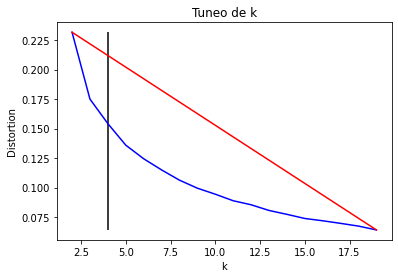

In [55]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the curve
plt.plot(K, distortions, 'b-')

# calculo recta para ver mejor punto
a = (Y_line[1] - Y_line[0]) / (X_line[1] - X_line[0])
b = Y_line[0] - a * X_line[0]
plt.plot(K, [(lambda x: a*x + b)(i) for i in K], 'r');

plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Tuneo de k')

best_k = np.argmax([(lambda x: a*x + b)(K[i]) - distortions[i] for i in range(len(K))])
plt.vlines(best_k, ymin=Y_line[0], ymax=Y_line[1])
print('Best_k', best_k)
plt.show()

In [56]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
y_pred = kmeans.fit_predict(reduced)

In [57]:
y_pred

array([2, 0, 1, 1, 0, 3, 3, 2, 1, 2, 2, 3, 2, 0, 0, 0, 2, 3, 1, 0, 2, 0,
       0, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 3, 0, 3, 0, 3, 1, 2, 0, 3, 2, 2,
       2, 1, 3, 3, 0, 1, 0, 3, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0,
       0, 1, 1, 1, 0, 3, 2, 2, 0, 3, 3, 1, 3, 3, 1, 1, 3, 2, 2, 0, 0, 0,
       0, 0], dtype=int32)

In [79]:
def plot3d(coords, colors, text='', title=''):
  scatter = go.Scatter3d(
              x=coords['x'],
              y=coords['y'],
              z=coords['z'],
              text=text,
              textposition='middle center',
              showlegend=False,
              mode='text',
              hoverinfo='text',
              textfont=dict(size=20),
              marker=dict(
                  size=6,
                  symbol='circle',
                  color = colors
              )
          )

    
  layout = go.Layout(
      title=title,
      width=650,
      height=520,
      scene=dict(xaxis={'showbackground':False,
                        'gridcolor':'rgba(0,0,40,0.4)'},
                 yaxis={'showbackground':False,
                        'gridcolor':'rgba(0,0,40,0.4)'},
                 zaxis={'showbackground':False,
                        'gridcolor':'rgba(0,0,40,0.4)'}),
      )

  fig = go.Figure(data=[scatter], layout = layout)
  fig.for_each_trace(lambda t: t.update(textfont_color=t.marker.color, textposition='middle center'))
  iplot(fig, validate=False)

In [80]:
palette = sns.color_palette(n_colors=len(y_pred)).as_hex()
colors = [palette[i] for i in y_pred]

In [81]:
coords = pd.DataFrame(data = reduced, columns = ['x', 'y','z'])
plot3d(coords, colors=colors, text=y)